In [6]:
import numpy as np
import pandas as pd
from scipy import interpolate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
################## xfit ##################

xfit1=[0]
x=0
for n in range(1,100):
    if n<=5 or n>95:
        x+=0.001
    elif n>5 and n<=95:
        x+=0.011
        
    xfit1.append(x)

########
xfit2=[]
x=0
for n in range(1,101):
    if n<=5 or n>95:
        x+=0.001
    elif n>5 and n<=95:
        x+=0.011
        
    xfit2.append(x)
xfit2.reverse()

## combining and building array:
xfit=xfit1+xfit2
xfit_arr=np.array(xfit)
x_dataset=pd.DataFrame(xfit).T
x_dataset.to_csv("x_dataset.csv")

x_dataset.shape

(1, 200)

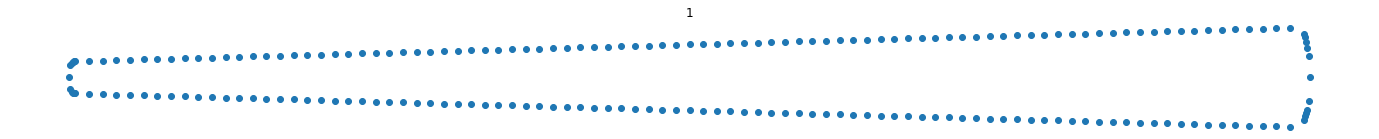

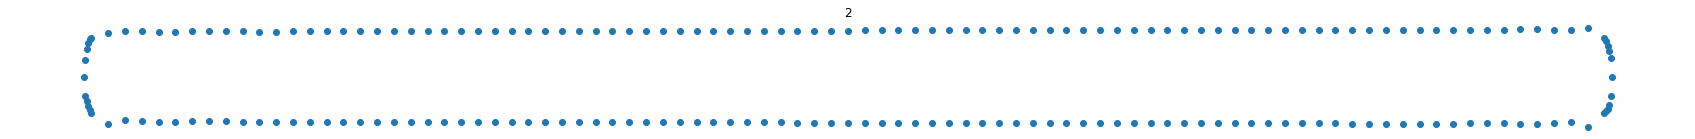

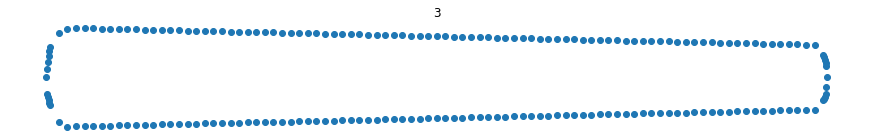

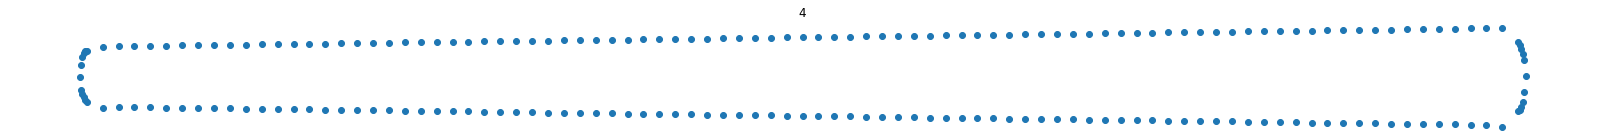

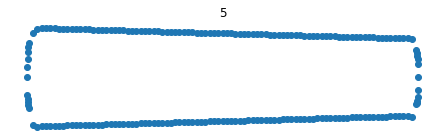

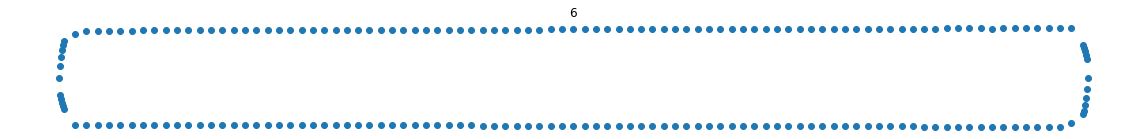

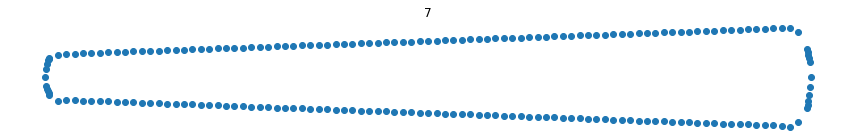

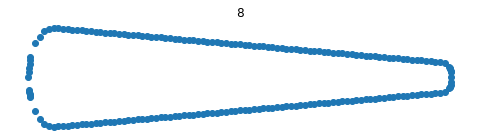

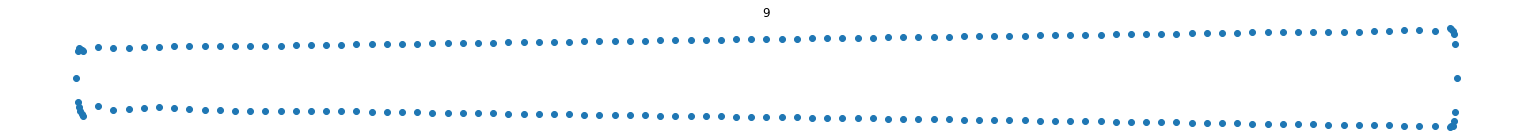

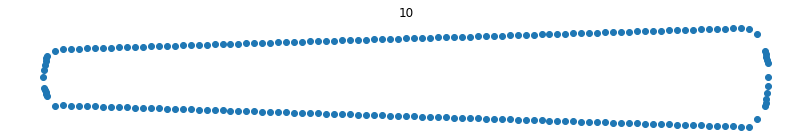

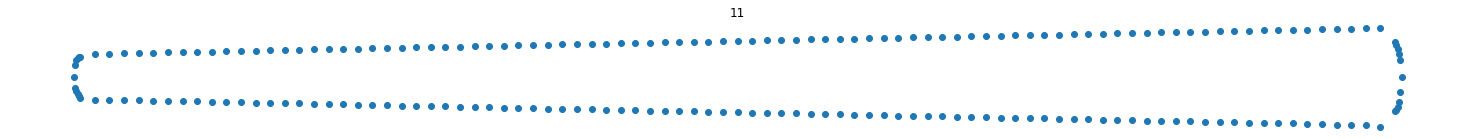

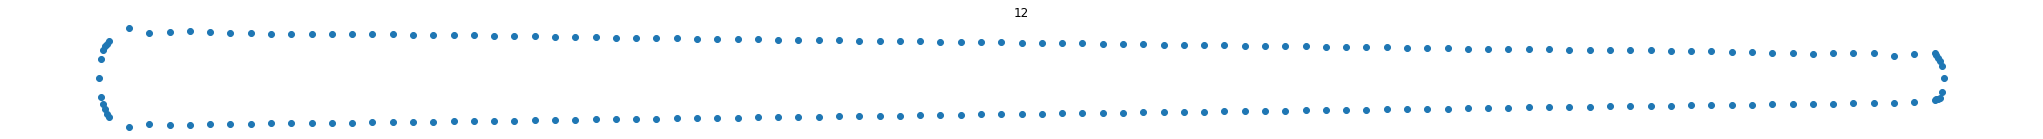

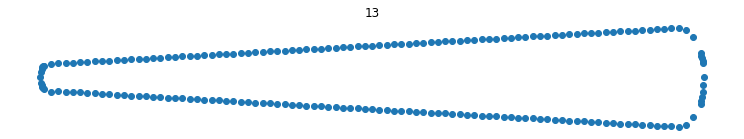

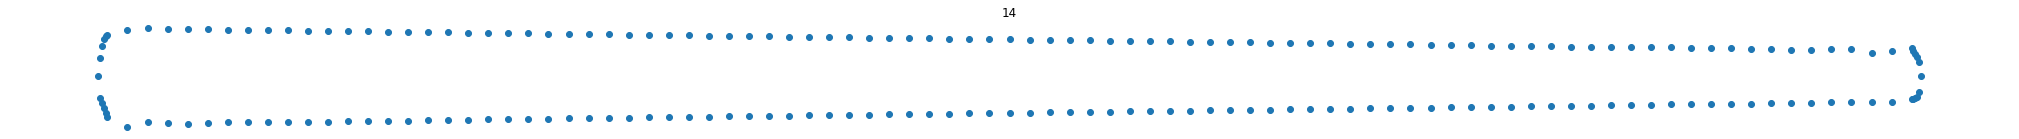

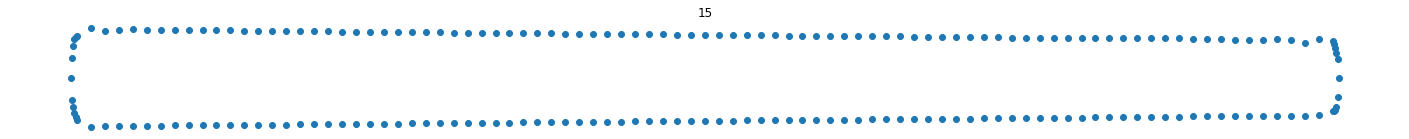

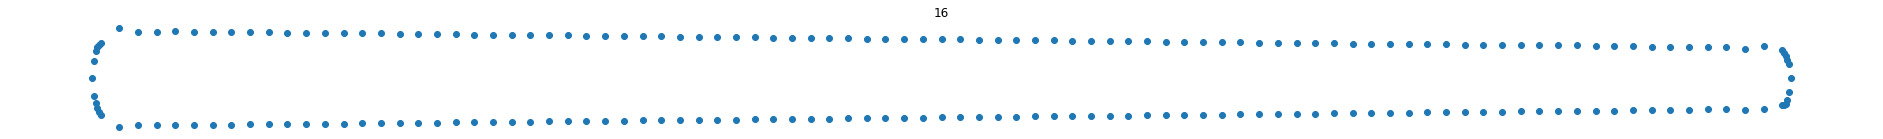

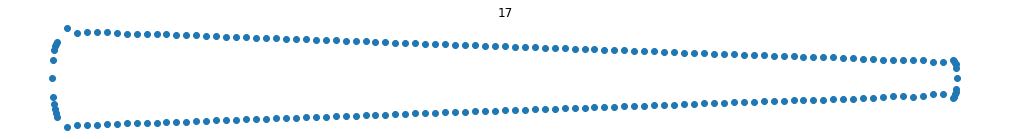

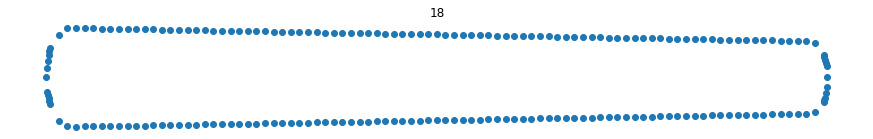

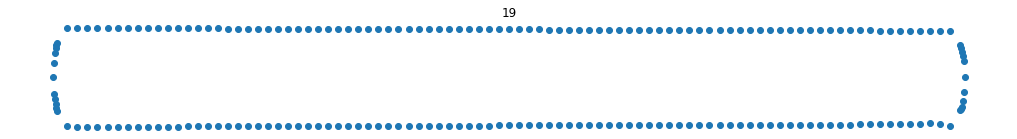

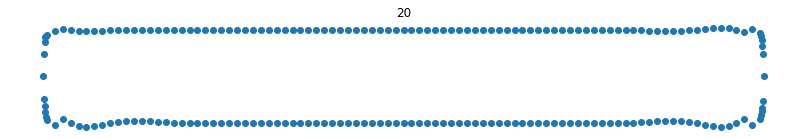

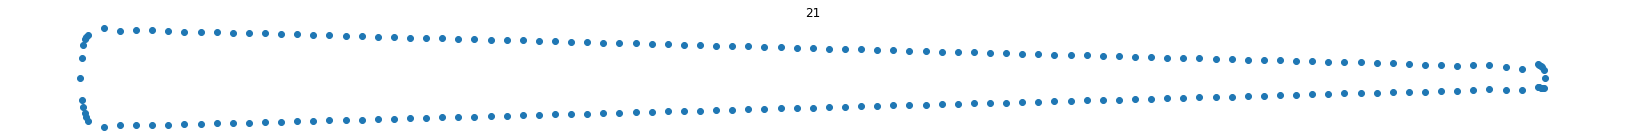

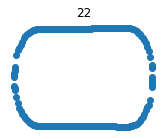

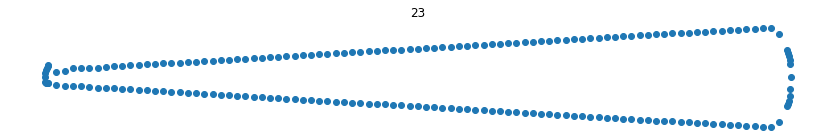

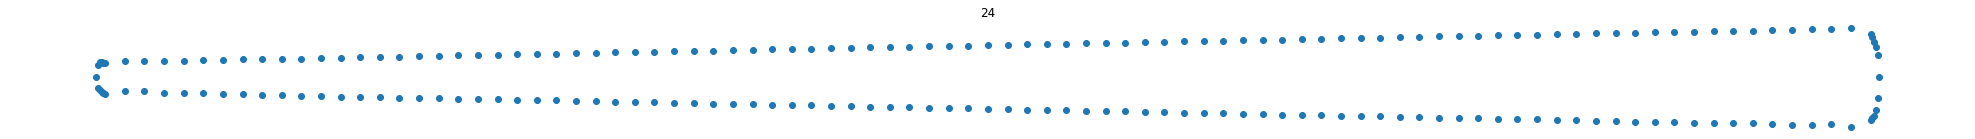

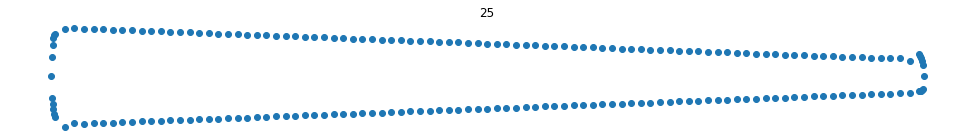

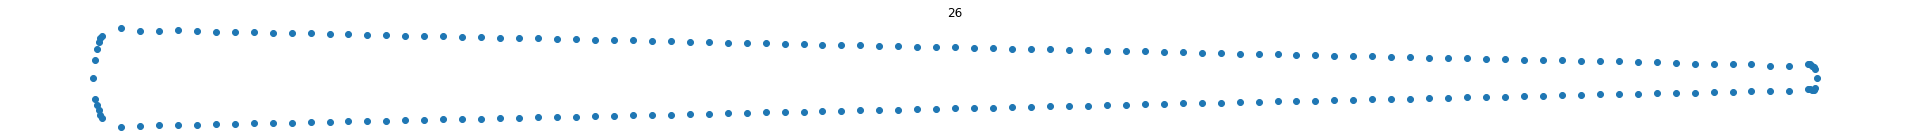

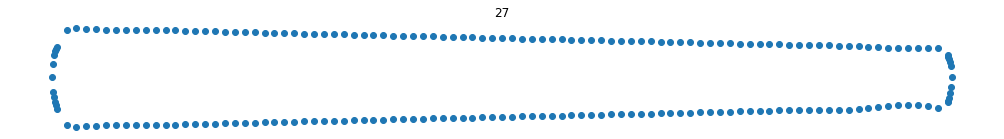

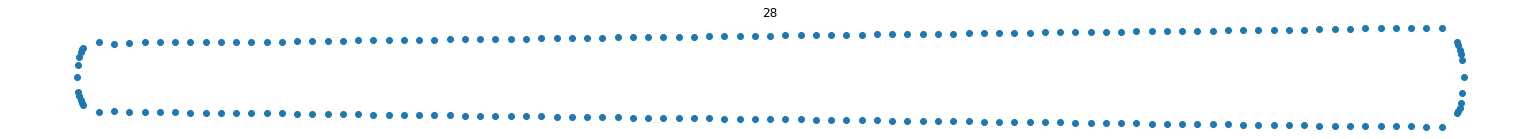

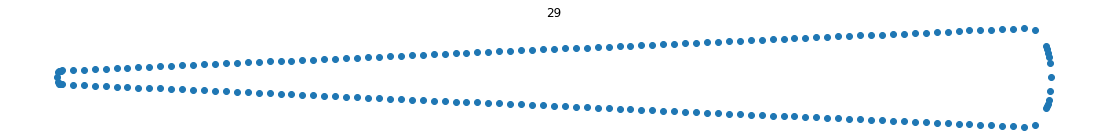

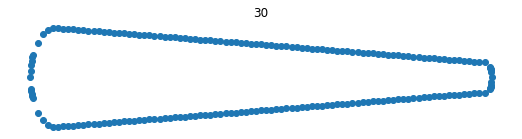

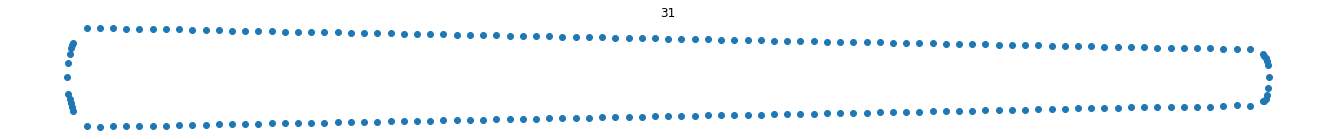

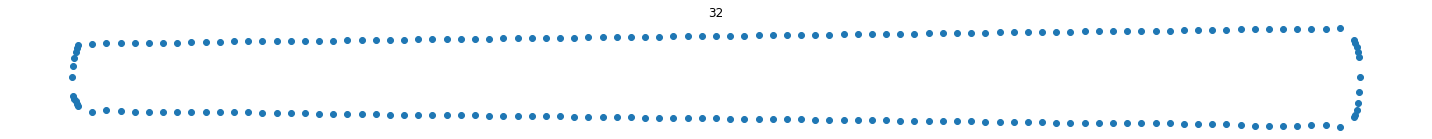

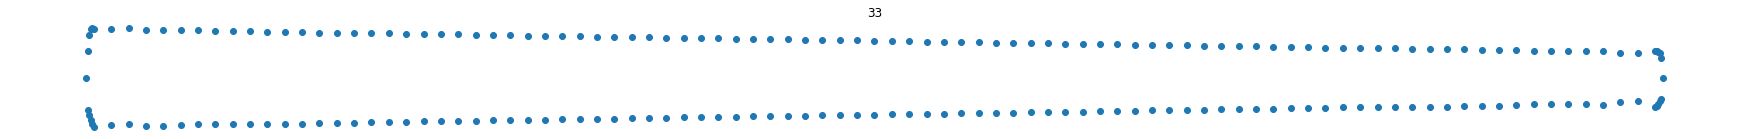

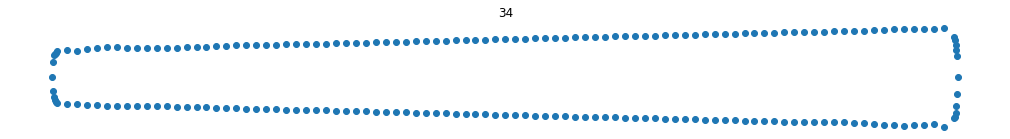

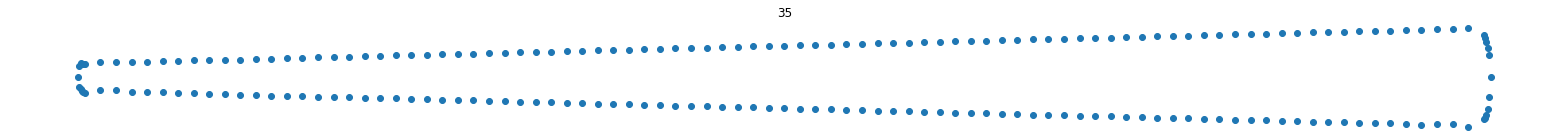

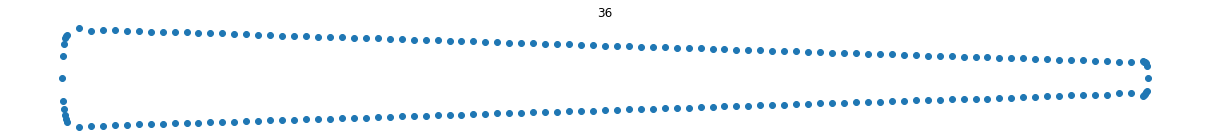

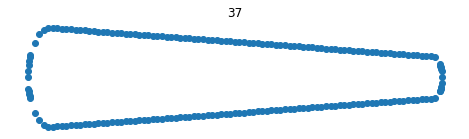

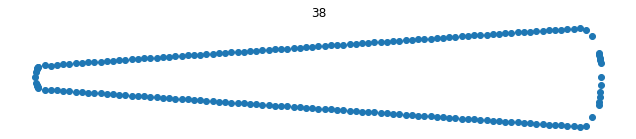

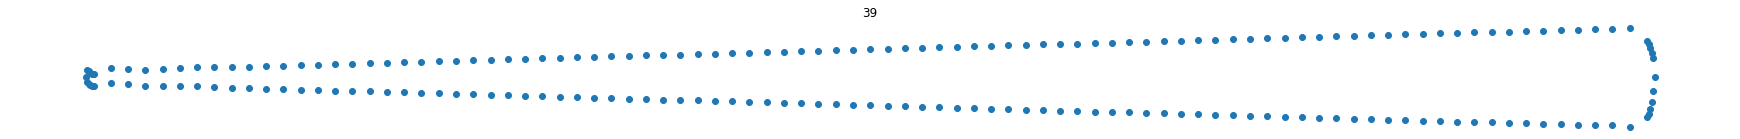

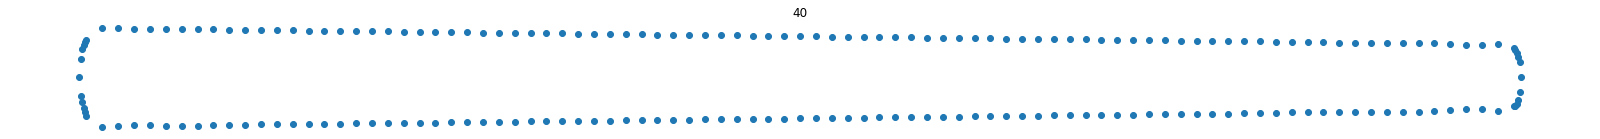

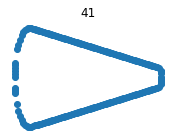

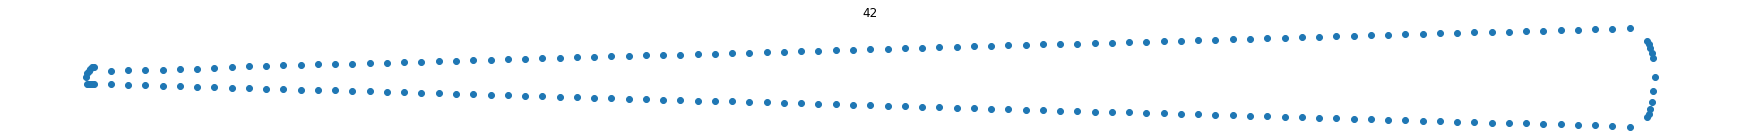

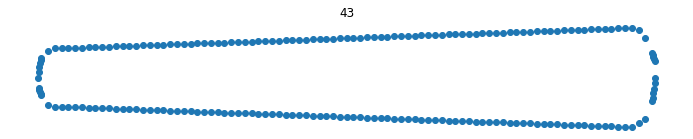

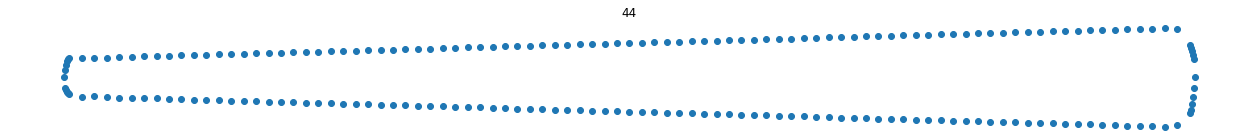

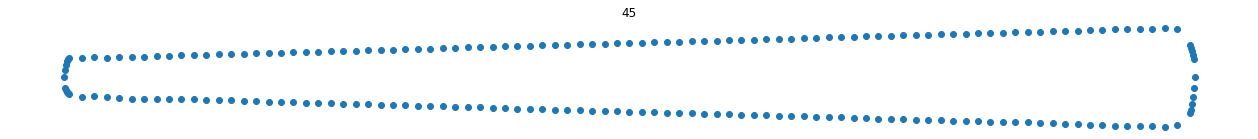

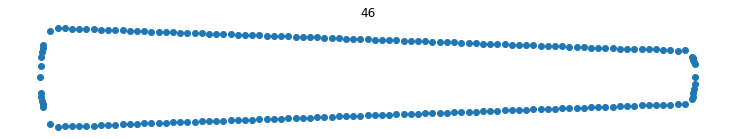

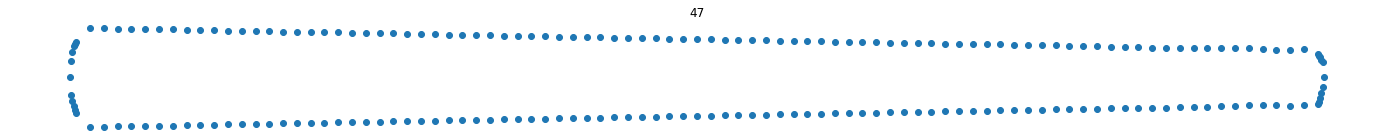

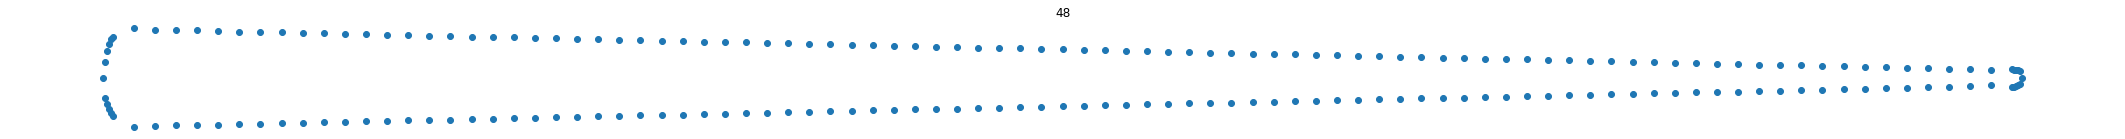

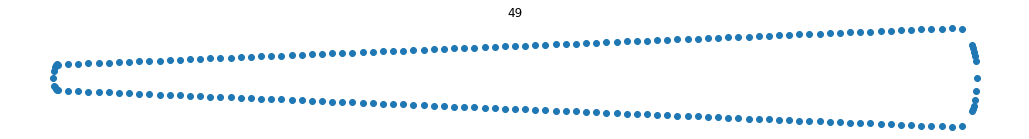

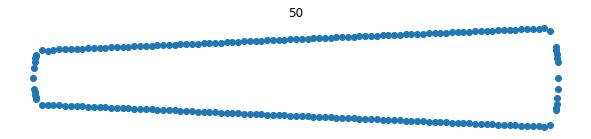

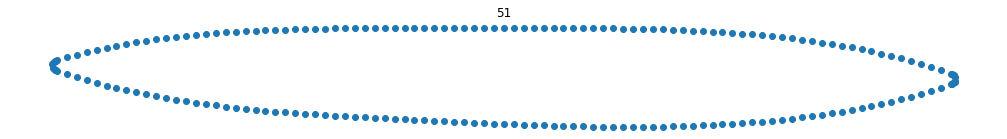

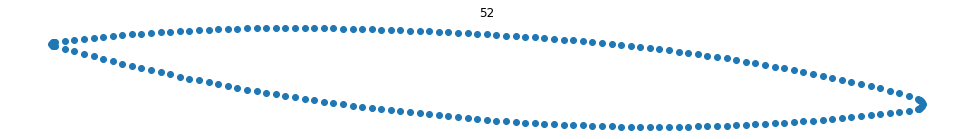

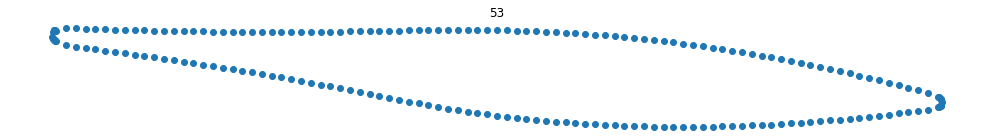

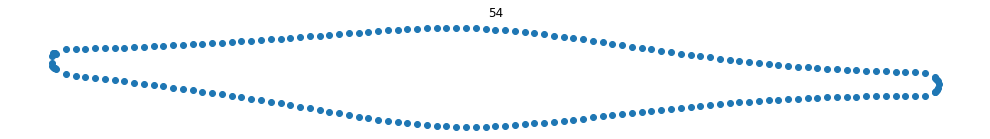

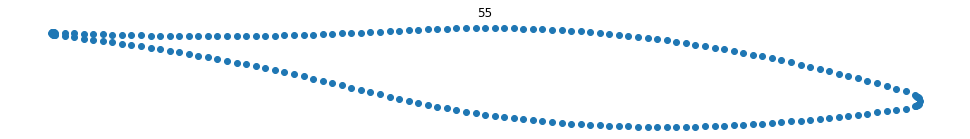

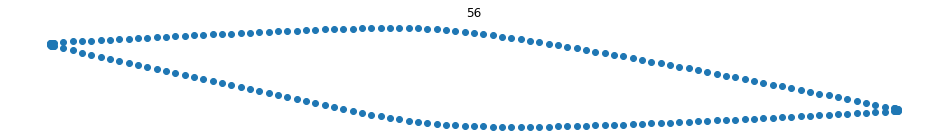

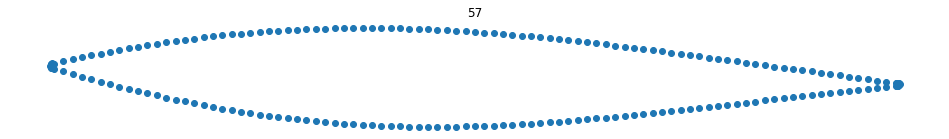

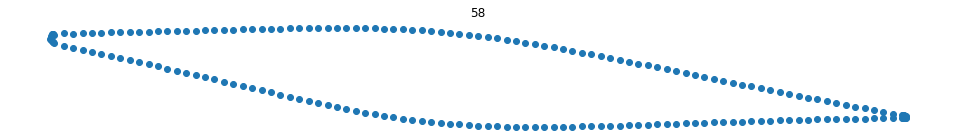

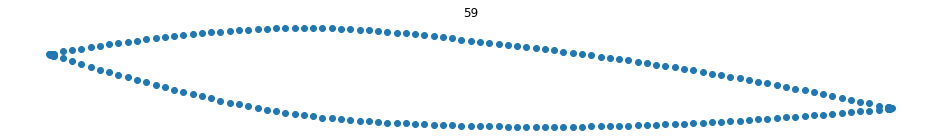

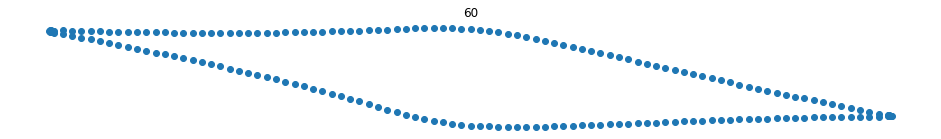

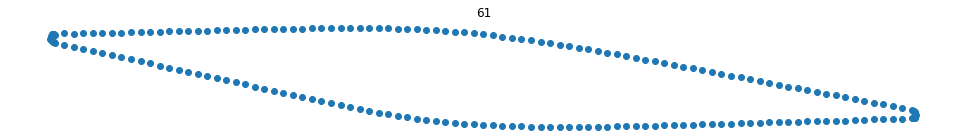

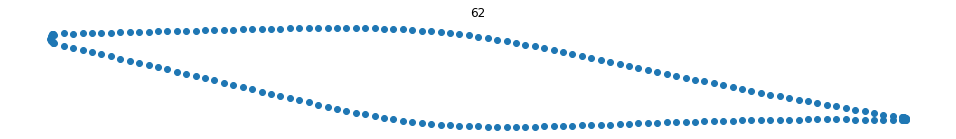

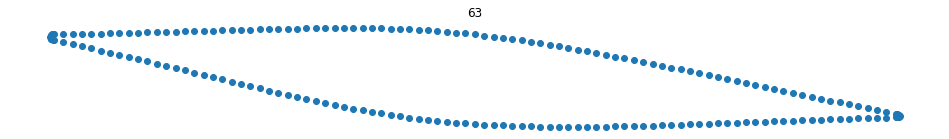

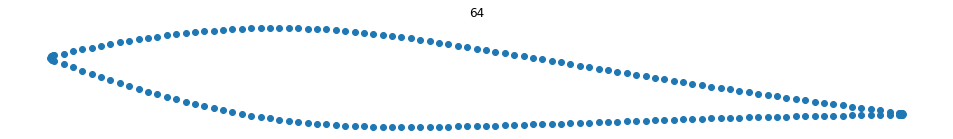

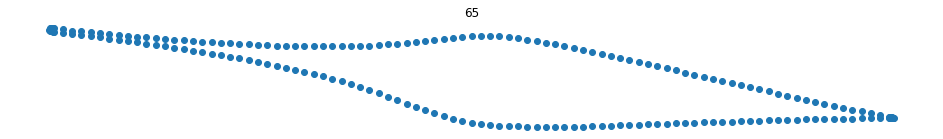

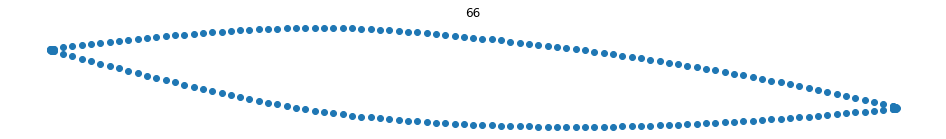

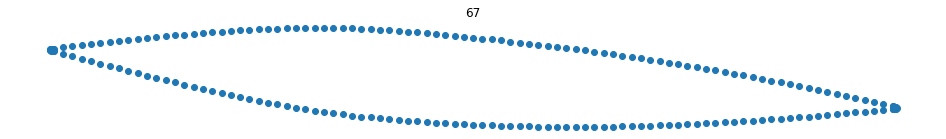

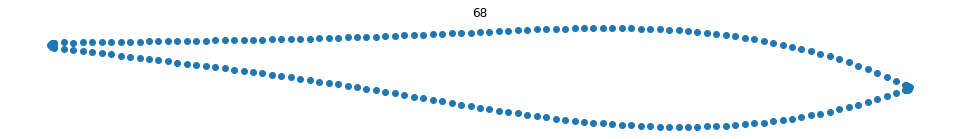

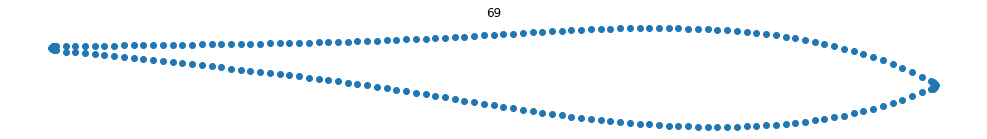

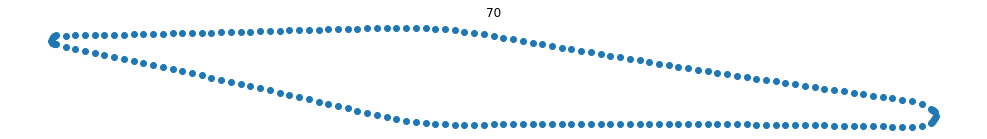

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000536,0.261761,0.288049,0.306364,0.323304,0.332256,0.335014,0.340024,0.348323,0.355608,...,-0.362325,-0.354742,-0.347040,-0.339724,-0.331156,-0.321730,-0.324181,-0.324779,-0.302198,-0.232163
1,0.017876,0.346255,0.566488,0.700816,0.771477,0.800711,0.893626,0.940974,0.931347,0.923580,...,-0.892916,-0.901104,-0.882949,-0.860842,-0.945198,-0.722213,-0.653236,-0.572862,-0.480335,-0.374898
2,0.004875,0.171395,0.314275,0.435415,0.536708,0.620053,0.890894,0.981190,1.000000,0.996764,...,-0.982717,-0.987120,-0.990032,-1.000000,-0.908634,-0.562933,-0.513606,-0.460797,-0.404391,-0.344274
3,0.017470,0.258907,0.411071,0.495233,0.532667,0.544645,0.613119,0.633273,0.635232,0.639721,...,-0.608943,-0.604759,-0.601220,-0.591333,-0.621942,-0.502008,-0.454400,-0.397661,-0.331093,-0.254003
4,0.005257,0.210251,0.378866,0.514803,0.621765,0.703457,0.909313,0.984130,1.000000,0.992629,...,-0.982158,-0.986575,-0.985056,-1.000000,-0.964885,-0.617688,-0.561119,-0.499484,-0.432577,-0.360190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.564944,0.583762,0.582361,0.580156,0.579459,0.580070,0.617812,0.639031,0.654647,0.675441,...,0.279540,0.328333,0.377749,0.429147,0.481659,0.528235,0.533162,0.538573,0.544567,0.551239
66,0.564944,0.583762,0.582361,0.580156,0.579459,0.580070,0.617812,0.639031,0.654647,0.675441,...,0.279540,0.328333,0.377749,0.429147,0.481659,0.528235,0.533162,0.538573,0.544567,0.551239
67,0.651049,0.684306,0.699053,0.701662,0.698505,0.695627,0.713279,0.706553,0.708702,0.713959,...,0.487262,0.509814,0.532626,0.555191,0.576515,0.605848,0.610921,0.616880,0.623848,0.631949
68,0.589129,0.617988,0.630340,0.632087,0.629133,0.626876,0.642513,0.636358,0.638005,0.642742,...,0.446844,0.466567,0.486540,0.506242,0.524862,0.550095,0.554443,0.559577,0.565612,0.572665


In [11]:
y_points=[]

for n in range(1,71):
    ### read data ###
    data= pd.read_csv(f"data{n}.csv")

    x_data=data["x"]
    y_data=data["y"]

    # Reshape 
    x_data_a=np.array(x_data)
    x_data_re=x_data_a.reshape(-1,1)
    y_data_a=np.array(y_data)
    y_data_re=y_data_a.reshape(-1,1)

    ### Normalization: Scaling between 0,1 
    model=MinMaxScaler()
    x_scaled=model.fit_transform(x_data_re)

    x_scaled.flatten()

    y_half1=[]
    y_half2=[]
    for i in range(0,y_data_re.shape[0]):
        if i<int(y_data_re.shape[0]/2):
            yh=y_data_re[i].tolist()
            y_half1+=yh
        else:
            yh=y_data_re[i].tolist()
            y_half2+=yh

    y_half2.reverse()

    x_half1=[]
    x_half2=[]
    for i in range(0,x_scaled.shape[0]):
        if i<int(x_scaled.shape[0]/2):
            xh=x_scaled[i].tolist()
            x_half1+=xh
        else:
            xh=x_scaled[i].tolist()
            x_half2+=xh

    x_half2.reverse()
        
        ############# yfit ###############

    ### Spiral Interpolation half1: Up
    x_r=x_half1
    y_r=y_half1
    xfit= xfit1

    tck=interpolate.splrep(x_r,y_r,s=0)
    yfit1=interpolate.splev(xfit,tck,der=0)

    ### Spiral Interpolation half1: Down
    x_r=x_half2
    y_r=y_half2
    xfit=xfit2

    tck=interpolate.splrep(x_r,y_r,s=0)
    yfit2=interpolate.splev(xfit,tck,der=0)


    ### Standardization
    yfit1_list=yfit1.tolist()
    yfit2_list=yfit2.tolist()
    yfit=yfit1_list+yfit2_list
    yfit_arr=np.array(yfit)
    yfit_re=yfit_arr.reshape(-1,1)

    model= MinMaxScaler()
    yfit_scaled_norm=model.fit_transform(yfit_re)
    yfit_scaled=2*(yfit_scaled_norm)-1
    yfit_scaled_flat=yfit_scaled.flatten()
    
    yfit_list=yfit_scaled_flat.tolist()
    y_points.append(yfit_list)
############
    plt.figure(figsize=(max(x_data)-min(x_data),2))
    plt.scatter(xfit_arr,yfit_scaled_flat)
    
#     plt.figure(figsize=((max(x_data)-min(x_data)),(max(y_data)-min(y_data))))
#     plt.scatter(x_data,y_data)
   
    plt.title(f"{n}")
    plt.axis('off')
    plt.show()
#############
y_points_arr=np.array(y_points)
y_dataset=pd.DataFrame(y_points_arr)
y_dataset.to_csv("y_dataset.csv")
y_dataset